In [2]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Read Data:

In [3]:
## dataset path
dataset_path = Path(r'D:/Data Set/Fish_Dataset/Fish_Dataset')

# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(dataset_path.glob(r'**/*.png'))

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

# path converted to pandas
file_path = pd.Series(file_path).astype(str)
print('file_path:',file_path)


labels = pd.Series(labels)
print('labels',labels)

df = pd.concat([file_path, labels], axis=1)
print(df)

df.columns = ['image', 'label']

df.head()

file_path: 0      D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...
1      D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...
2      D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...
3      D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...
4      D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...
                             ...                        
795    D:\Data Set\Fish_Dataset\Fish_Dataset\Trout\Tr...
796    D:\Data Set\Fish_Dataset\Fish_Dataset\Trout\Tr...
797    D:\Data Set\Fish_Dataset\Fish_Dataset\Trout\Tr...
798    D:\Data Set\Fish_Dataset\Fish_Dataset\Trout\Tr...
799    D:\Data Set\Fish_Dataset\Fish_Dataset\Trout\Tr...
Length: 800, dtype: object
labels 0      Black Sea Sprat
1      Black Sea Sprat
2      Black Sea Sprat
3      Black Sea Sprat
4      Black Sea Sprat
            ...       
795              Trout
796              Trout
797              Trout
798              Trout
799              Trout
Length: 800, dtype: object
                                                

,image,label
0,D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...,Black Sea Sprat
1,D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...,Black Sea Sprat
2,D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...,Black Sea Sprat
3,D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...,Black Sea Sprat
4,D:\Data Set\Fish_Dataset\Fish_Dataset\Black Se...,Black Sea Sprat


# Display the images in the dataset:


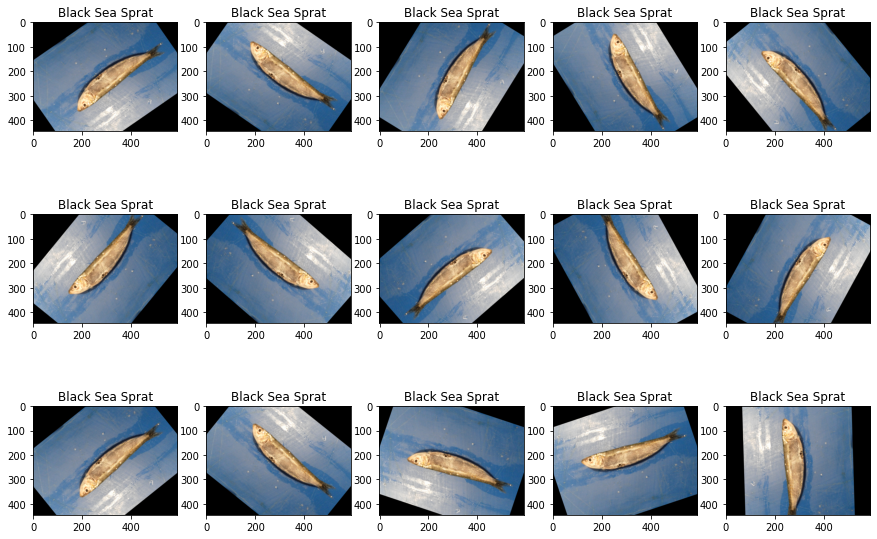

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))# subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df.image[i]))
    ### set title of data frame label
    ax.set_title(df.label[i])
    
plt.show()

# Number of diffrent class of fish in the dataset:

In [12]:
### Read count of label from dataframe
df.label.value_counts()
#df.label

Black Sea Sprat       100
Gilt-Head Bream       100
Hourse Mackerel       100
Red Mullet            100
Red Sea Bream         100
Sea Bass              100
Striped Red Mullet    100
Trout                 100
Name: label, dtype: int64

# Train, Test and Validation Dataset:


In [5]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (448, 2)
Shape of test data (240, 2)
Shape of validation data (112, 2)


In [6]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 448 validated image filenames belonging to 8 classes.
Found 240 validated image filenames belonging to 8 classes.
Found 112 validated image filenames belonging to 8 classes.


In [7]:
input_shape = (200, 200, 3)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)      

In [9]:
from tensorflow.keras.optimizers import Adam
#Adaptive Movement Estimation 

# Train the model:


In [13]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
14/14 [==============================] - 83s 6s/step - loss: 2.0831 - accuracy: 0.1339 - val_loss: 2.0776 - val_accuracy: 0.1071
Epoch 2/20
14/14 [==============================] - 77s 5s/step - loss: 2.0750 - accuracy: 0.1674 - val_loss: 2.0464 - val_accuracy: 0.1607
Epoch 3/20
14/14 [==============================] - 101s 7s/step - loss: 2.0053 - accuracy: 0.2433 - val_loss: 1.7937 - val_accuracy: 0.2857
Epoch 4/20
14/14 [==============================] - 113s 8s/step - loss: 1.7870 - accuracy: 0.2879 - val_loss: 1.6427 - val_accuracy: 0.2946
Epoch 5/20
14/14 [==============================] - 116s 8s/step - loss: 1.6005 - accuracy: 0.3438 - val_loss: 1.3327 - val_accuracy: 0.4464
Epoch 6/20
14/14 [==============================] - 114s 8s/step - loss: 1.5813 - accuracy: 0.3170 - val_loss: 1.4248 - val_accuracy: 0.3571
Epoch 7/20
14/14 [==============================] - 113s 8s/step - loss: 1.4499 - accuracy: 0.3839 - val_loss: 1.6536 - val_accuracy: 0.3214
Epoch 8/20
14/1

In [14]:
model.save('model-1.h5')
#model = keras.models.load_model('model-1.h5')

# Model performance:


In [15]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

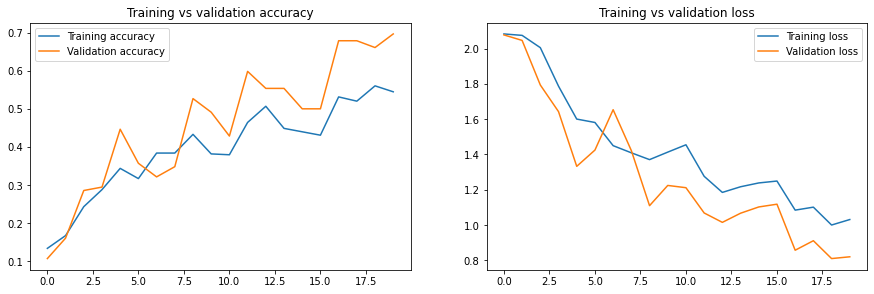

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [17]:
pred = model.predict(test)

In [19]:
import numpy as np
pred = np.argmax(pred, axis=1)

In [20]:
labels = train.class_indices
labels

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Striped Red Mullet': 6,
 'Trout': 7}

In [21]:
labels = dict((v,k) for k, v in labels.items())

In [22]:
y_pred = [labels[k] for k in pred]

In [23]:
labels

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Striped Red Mullet',
 7: 'Trout'}

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(x_test.label, y_pred))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.67      0.77      0.71        26
   Gilt-Head Bream       0.52      0.34      0.42        32
   Hourse Mackerel       0.60      0.56      0.58        32
        Red Mullet       1.00      1.00      1.00        23
     Red Sea Bream       0.62      0.60      0.61        30
          Sea Bass       0.56      0.69      0.62        26
Striped Red Mullet       0.81      0.69      0.75        36
             Trout       0.80      1.00      0.89        35

          accuracy                           0.70       240
         macro avg       0.70      0.71      0.70       240
      weighted avg       0.69      0.70      0.69       240



# Confusion Matrix:

In [26]:
print(confusion_matrix(x_test.label, y_pred))

[[20  0  0  0  0  0  0  6]
 [ 5 11  1  0  0 13  0  2]
 [ 0  0 18  0  9  0  5  0]
 [ 0  0  0 23  0  0  0  0]
 [ 0  8  2  0 18  1  1  0]
 [ 5  2  0  0  0 18  0  1]
 [ 0  0  9  0  2  0 25  0]
 [ 0  0  0  0  0  0  0 35]]


# Accuracy:

In [27]:
est_accuracy = model.evaluate(test)[1]

8/8 [==============================] - 13s 1s/step - loss: 0.9008 - accuracy: 0.6458
